In [117]:
import scipy.io 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx
import pandas as pd

In [119]:
mat_path = r"Coactivation_matrix.mat" #este es nuestro archivo
scipy.io.loadmat(mat_path)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Wed Dec 25 01:14:03 2013',
 '__version__': '1.0',
 '__globals__': [],
 'Coactivation_matrix': array([[0.        , 0.16071429, 0.11148649, ..., 0.        , 0.05045872,
         0.1011236 ],
        [0.16071429, 0.        , 0.06825939, ..., 0.        , 0.        ,
         0.06923077],
        [0.11148649, 0.06825939, 0.        , ..., 0.03412969, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.03412969, ..., 0.        , 0.        ,
         0.        ],
        [0.05045872, 0.        , 0.        , ..., 0.        , 0.        ,
         0.09777778],
        [0.1011236 , 0.06923077, 0.        , ..., 0.        , 0.09777778,
         0.        ]]),
 'Coord': array([[ 7.24363636, 37.01090909,  9.42545455],
        [ 7.98653199, 46.22222222, 15.60942761],
        [ 7.55725191, 33.83206107, 23.51145038],
        ...,
        [-4.92385787, 15.31979695, 27.73604061],
        [-6.27312775, 34.70484

In [121]:
mat_j = scipy.io.loadmat(mat_path)
mat_j

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Wed Dec 25 01:14:03 2013',
 '__version__': '1.0',
 '__globals__': [],
 'Coactivation_matrix': array([[0.        , 0.16071429, 0.11148649, ..., 0.        , 0.05045872,
         0.1011236 ],
        [0.16071429, 0.        , 0.06825939, ..., 0.        , 0.        ,
         0.06923077],
        [0.11148649, 0.06825939, 0.        , ..., 0.03412969, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.03412969, ..., 0.        , 0.        ,
         0.        ],
        [0.05045872, 0.        , 0.        , ..., 0.        , 0.        ,
         0.09777778],
        [0.1011236 , 0.06923077, 0.        , ..., 0.        , 0.09777778,
         0.        ]]),
 'Coord': array([[ 7.24363636, 37.01090909,  9.42545455],
        [ 7.98653199, 46.22222222, 15.60942761],
        [ 7.55725191, 33.83206107, 23.51145038],
        ...,
        [-4.92385787, 15.31979695, 27.73604061],
        [-6.27312775, 34.70484

In [123]:
matriz_dict = {k:v for k, v in mat_j.items() if k[0] != '_'}
matriz_dict

{'Coactivation_matrix': array([[0.        , 0.16071429, 0.11148649, ..., 0.        , 0.05045872,
         0.1011236 ],
        [0.16071429, 0.        , 0.06825939, ..., 0.        , 0.        ,
         0.06923077],
        [0.11148649, 0.06825939, 0.        , ..., 0.03412969, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.03412969, ..., 0.        , 0.        ,
         0.        ],
        [0.05045872, 0.        , 0.        , ..., 0.        , 0.        ,
         0.09777778],
        [0.1011236 , 0.06923077, 0.        , ..., 0.        , 0.09777778,
         0.        ]]),
 'Coord': array([[ 7.24363636, 37.01090909,  9.42545455],
        [ 7.98653199, 46.22222222, 15.60942761],
        [ 7.55725191, 33.83206107, 23.51145038],
        ...,
        [-4.92385787, 15.31979695, 27.73604061],
        [-6.27312775, 34.70484581, -5.09251101],
        [-4.53874539, 46.53874539,  3.06273063]])}

In [125]:
dataframe = pd.DataFrame(matriz_dict['Coactivation_matrix'],)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,628,629,630,631,632,633,634,635,636,637
0,0.000000,0.160714,0.111486,0.000000,0.138095,0.00000,0.000000,0.000000,0.0,0.034351,...,0.0,0.000000,0.0,0.0,0.157676,0.053872,0.049383,0.000000,0.050459,0.101124
1,0.160714,0.000000,0.068259,0.000000,0.042056,0.00000,0.000000,0.000000,0.0,0.036585,...,0.0,0.000000,0.0,0.0,0.119149,0.042105,0.000000,0.000000,0.000000,0.069231
2,0.111486,0.068259,0.000000,0.224199,0.000000,0.00000,0.000000,0.052846,0.0,0.000000,...,0.0,0.047035,0.0,0.0,0.000000,0.161905,0.103943,0.034130,0.000000,0.000000
3,0.000000,0.000000,0.224199,0.000000,0.000000,0.00000,0.039275,0.048035,0.0,0.000000,...,0.0,0.048673,0.0,0.0,0.000000,0.000000,0.075697,0.108787,0.000000,0.000000
4,0.138095,0.042056,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.066079,0.000000,0.000000,0.000000,0.103448,0.053279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,0.053872,0.042105,0.161905,0.000000,0.000000,0.00000,0.000000,0.072650,0.0,0.051195,...,0.0,0.046414,0.0,0.0,0.078498,0.000000,0.196721,0.091255,0.000000,0.000000
634,0.049383,0.000000,0.103943,0.075697,0.000000,0.03876,0.000000,0.000000,0.0,0.000000,...,0.0,0.033019,0.0,0.0,0.057377,0.196721,0.000000,0.111650,0.000000,0.000000
635,0.000000,0.000000,0.034130,0.108787,0.000000,0.00000,0.105839,0.083951,0.0,0.000000,...,0.0,0.053528,0.0,0.0,0.000000,0.091255,0.111650,0.000000,0.000000,0.000000
636,0.050459,0.000000,0.000000,0.000000,0.103448,0.00000,0.000000,0.000000,0.0,0.046729,...,0.0,0.000000,0.0,0.0,0.059361,0.000000,0.000000,0.000000,0.000000,0.097778


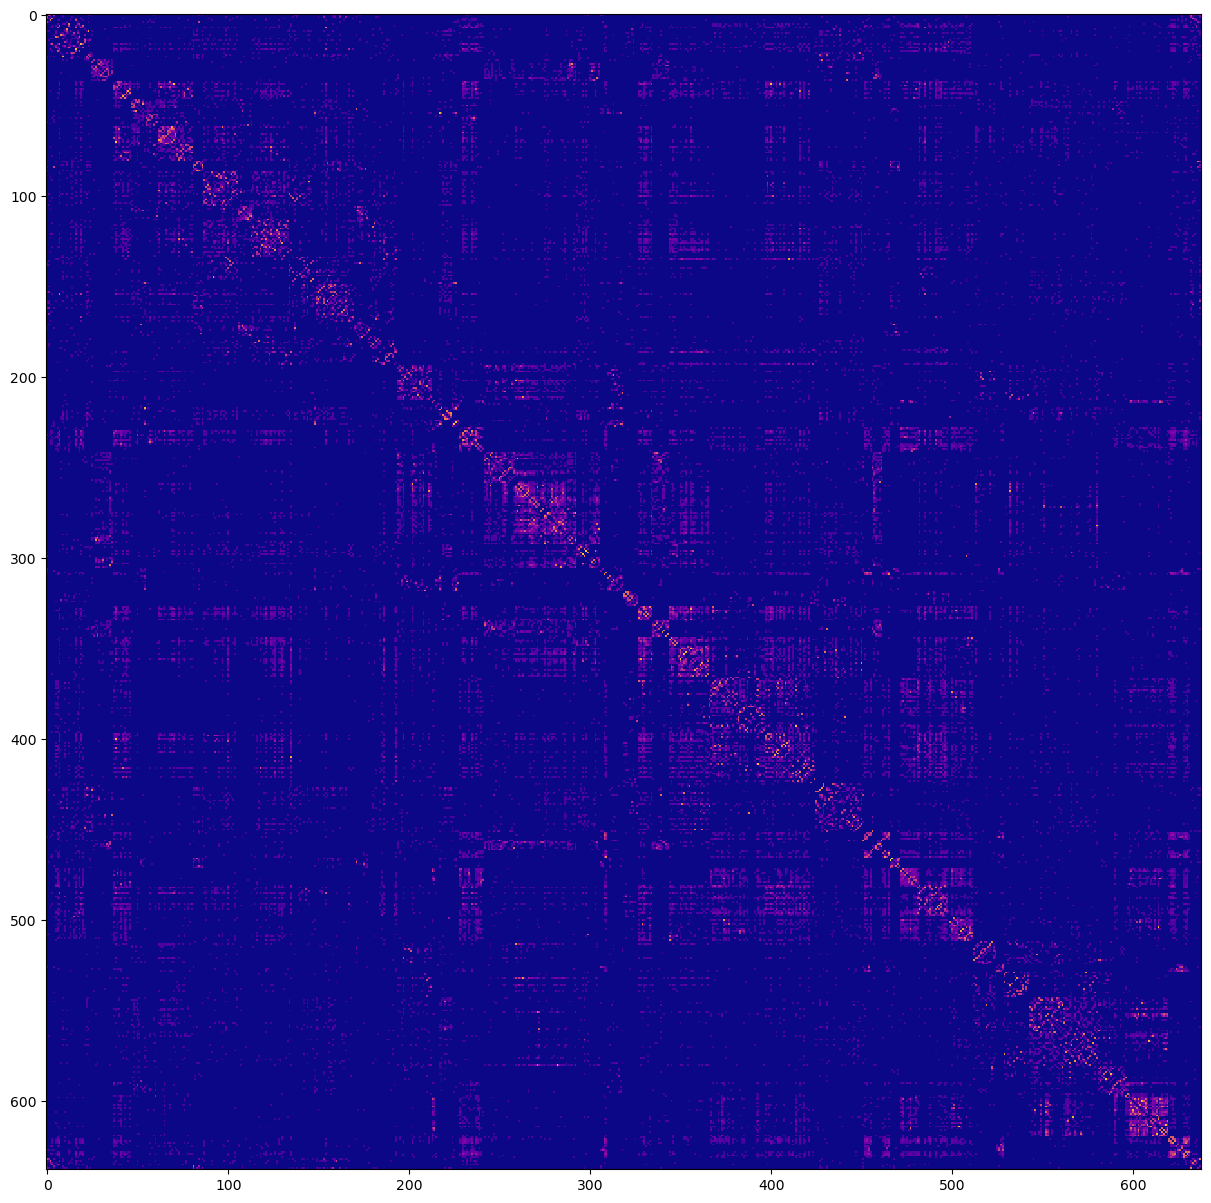

In [154]:
fig = plt.figure(figsize=(15, 15))

plt.imshow(matriz_dict['Coactivation_matrix'], cmap='plasma', interpolation='nearest')
plt.show()

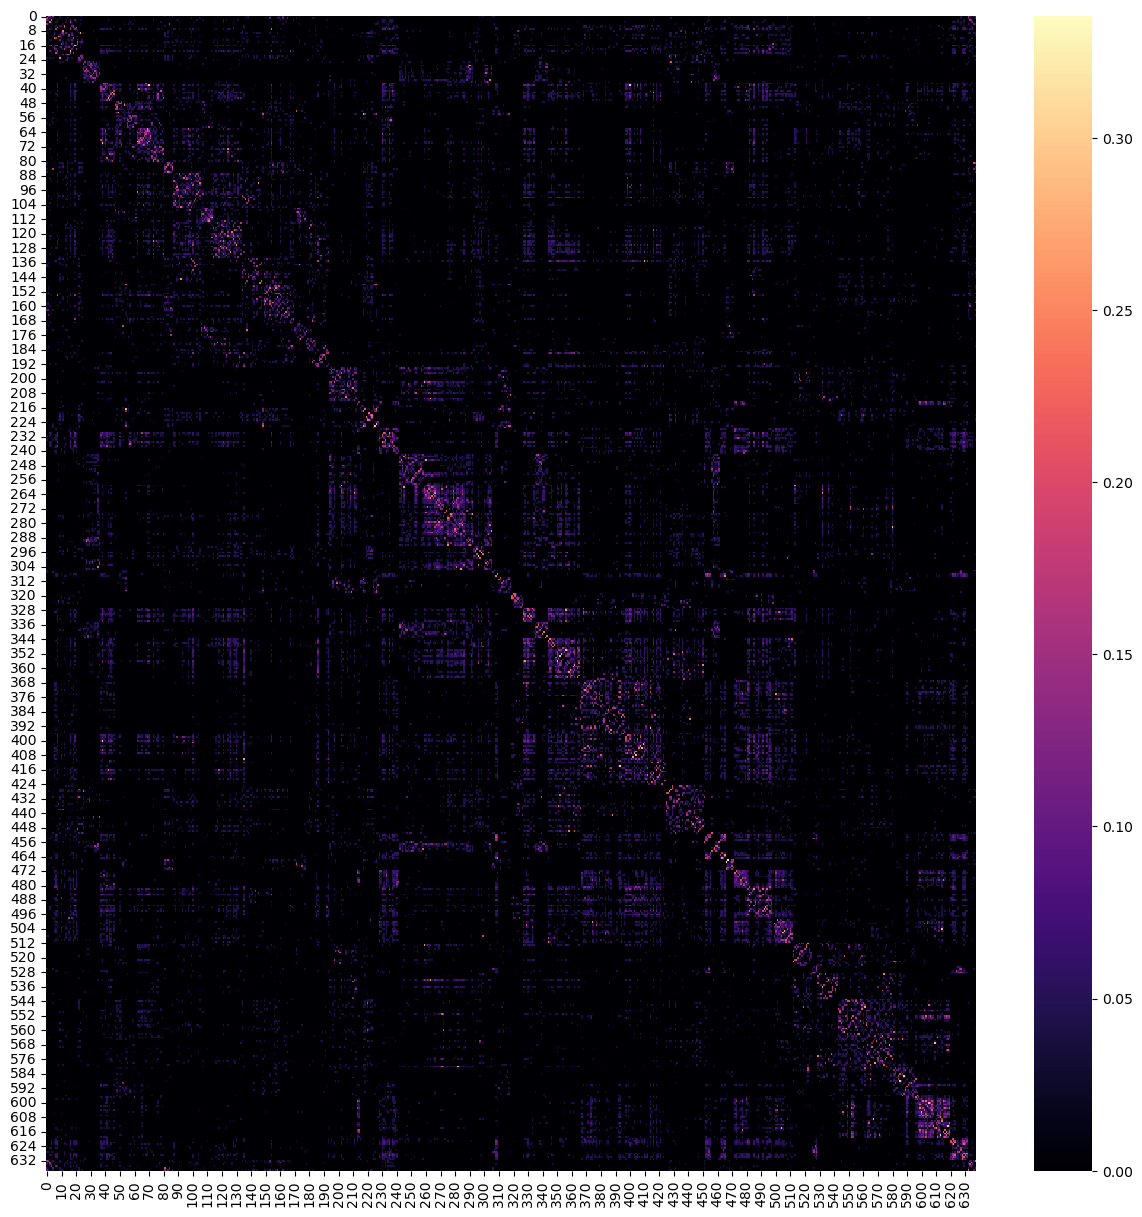

In [156]:
figure = plt.figure(figsize=(15, 15))
ax = sns.heatmap(matriz_dict['Coactivation_matrix'], cmap='magma')
plt.show()


In [132]:
dataframe_subset = dataframe.iloc[9:30, 9:30]
dataframe_subset

,9,10,11,12,13,14,15,16,17,18,...,20,21,22,23,24,25,26,27,28,29
9,0.000000,0.054299,0.145251,0.000000,0.103286,0.000000,0.000000,0.000000,0.068627,0.000000,...,0.000000,0.000000,0.044715,0.252381,0.000000,0.040650,0.000000,0.00000,0.000000,0.000000
10,0.054299,0.000000,0.075000,0.035556,0.000000,0.000000,0.140940,0.000000,0.107784,0.046414,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
11,0.145251,0.075000,0.000000,0.000000,0.000000,0.053435,0.059701,0.000000,0.000000,0.032864,...,0.000000,0.094488,0.000000,0.000000,0.000000,0.037234,0.000000,0.00000,0.000000,0.000000
12,0.000000,0.035556,0.000000,0.000000,0.000000,0.000000,0.000000,0.036697,0.033175,0.170833,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
13,0.103286,0.000000,0.000000,0.000000,0.000000,0.043478,0.055215,0.034398,0.087209,0.037344,...,0.000000,0.090323,0.000000,0.000000,0.046632,0.000000,0.000000,0.00000,0.000000,0.000000
14,0.000000,0.000000,0.053435,0.000000,0.043478,0.000000,0.000000,0.000000,0.034247,0.000000,...,0.000000,0.166667,0.038251,0.071038,0.099338,0.000000,0.000000,0.00000,0.000000,0.000000
15,0.000000,0.140940,0.059701,0.000000,0.055215,0.000000,0.000000,0.000000,0.115108,0.000000,...,0.000000,0.141667,0.000000,0.036269,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
16,0.000000,0.000000,0.000000,0.036697,0.034398,0.000000,0.000000,0.000000,0.030612,0.042411,...,0.136674,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
17,0.068627,0.107784,0.000000,0.033175,0.087209,0.034247,0.115108,0.030612,0.000000,0.099057,...,0.000000,0.000000,0.000000,0.038647,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
18,0.000000,0.046414,0.032864,0.170833,0.037344,0.000000,0.000000,0.042411,0.099057,0.000000,...,0.150877,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


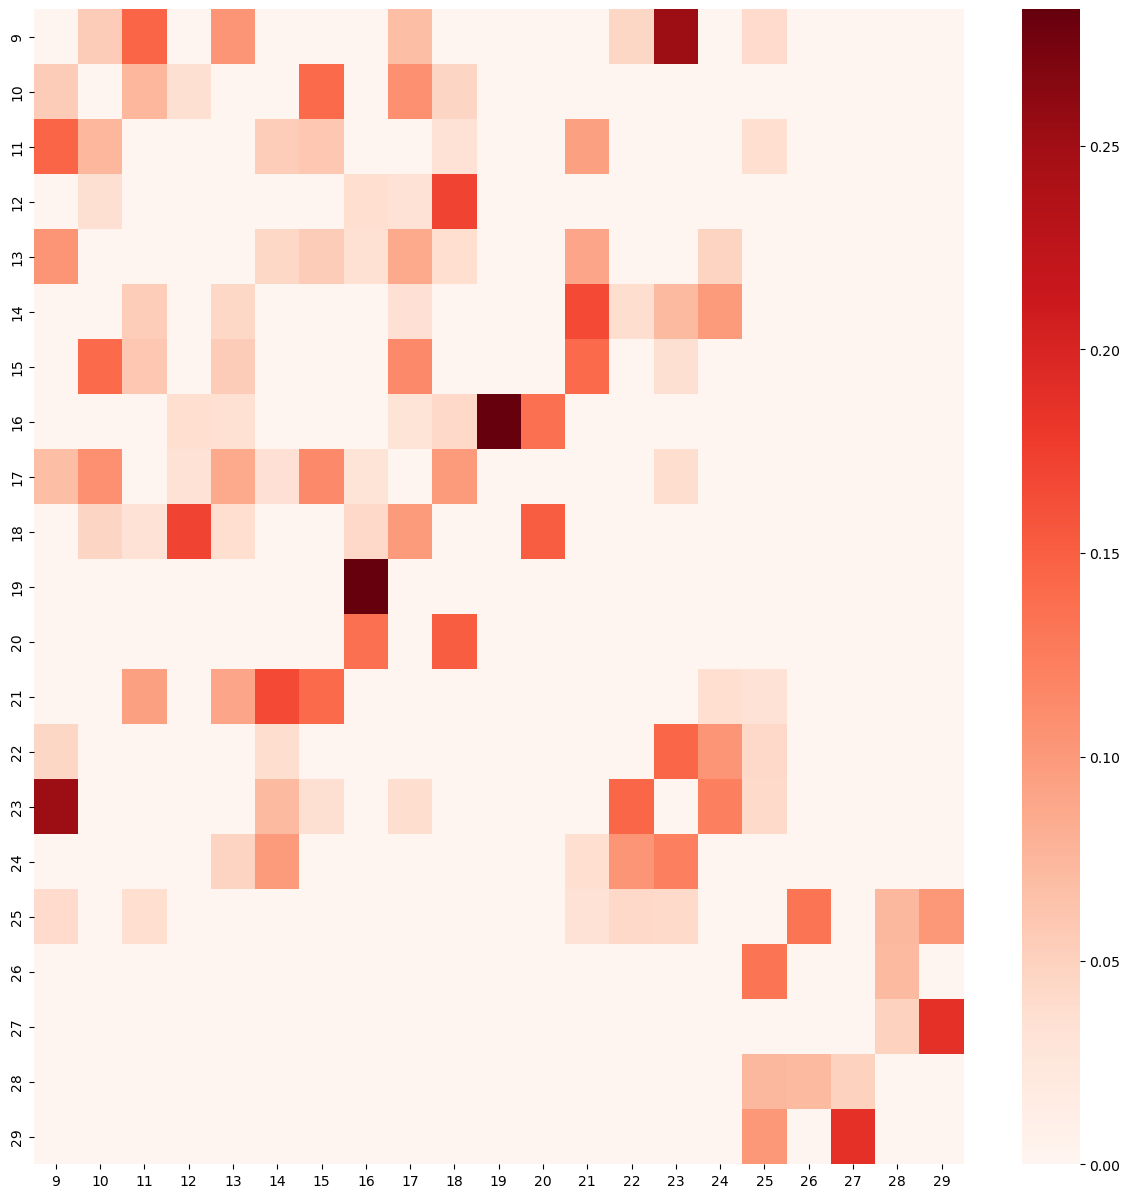

In [162]:
figure = plt.figure(figsize=(15, 15))
ax = sns.heatmap(dataframe_subset, cmap='Reds') 
plt.show()


(array([[608.,  24.,   1., ...,   0.,   0.,   0.],
        [612.,  19.,   2., ...,   0.,   0.,   0.],
        [603.,  28.,   3., ...,   0.,   0.,   0.],
        ...,
        [602.,  31.,   2., ...,   0.,   0.,   0.],
        [619.,  15.,   1., ...,   0.,   0.,   0.],
        [595.,  33.,   6., ...,   0.,   0.,   0.]]),
 array([0.        , 0.03355263, 0.06710526, 0.10065789, 0.13421053,
        0.16776316, 0.20131579, 0.23486842, 0.26842105, 0.30197368,
        0.33552632]),
 <a list of 638 BarContainer objects>)

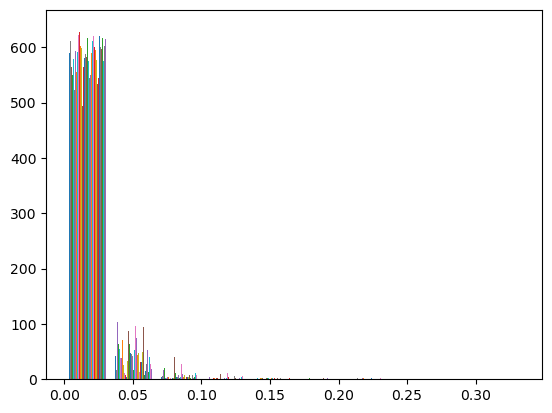

In [164]:

plt.hist(matriz_dict['Coactivation_matrix'])


In [165]:
binary_matrizadj = (matriz_dict['Coactivation_matrix'] > 0).astype(int)
binary_matrizadj

dataframe_binary = pd.DataFrame(binary_matrizadj)
dataframe_binary

,0,1,2,3,4,5,6,7,8,9,...,628,629,630,631,632,633,634,635,636,637
0,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,1,1,1,0,1,1
1,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,1
2,1,1,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,1,1,0,0
3,0,0,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,1,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,1,1,1,0,0,0,0,1,0,1,...,0,1,0,0,1,0,1,1,0,0
634,1,0,1,1,0,1,0,0,0,0,...,0,1,0,0,1,1,0,1,0,0
635,0,0,1,1,0,0,1,1,0,0,...,0,1,0,0,0,1,1,0,0,0
636,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [166]:
dataframe.describe()

,0,1,2,3,4,5,6,7,8,9,...,628,629,630,631,632,633,634,635,636,637
count,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,...,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000
mean,0.002894,0.002344,0.003422,0.003060,0.002319,0.004686,0.007691,0.011009,0.002290,0.004667,...,0.009119,0.013141,0.011431,0.005303,0.003083,0.003667,0.002205,0.003089,0.001794,0.003993
std,0.014959,0.013144,0.016451,0.015322,0.012493,0.017091,0.021394,0.025573,0.013503,0.017855,...,0.024850,0.028658,0.025629,0.017595,0.015821,0.016256,0.012580,0.012961,0.012401,0.017165
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.160714,0.160714,0.224199,0.224199,0.162562,0.213675,0.174051,0.216165,0.234694,0.252381,...,0.225263,0.225263,0.207424,0.214900,0.227273,0.196721,0.196721,0.111650,0.200980,0.227273


In [167]:
G = nx.from_pandas_adjacency(dataframe, create_using=nx.DiGraph)

graph_list = list(G.adjacency())

grads = {}
for idx in range(len(graph_list)):
    grads[graph_list[idx][0]] = len(graph_list[idx][1])

In [168]:
grads

{0: 32,
 1: 26,
 2: 38,
 3: 37,
 4: 29,
 5: 58,
 6: 88,
 7: 124,
 8: 29,
 9: 57,
 10: 54,
 11: 59,
 12: 44,
 13: 49,
 14: 50,
 15: 36,
 16: 124,
 17: 49,
 18: 86,
 19: 109,
 20: 73,
 21: 37,
 22: 62,
 23: 47,
 24: 31,
 25: 54,
 26: 20,
 27: 35,
 28: 27,
 29: 40,
 30: 30,
 31: 42,
 32: 31,
 33: 37,
 34: 29,
 35: 56,
 36: 49,
 37: 108,
 38: 149,
 39: 73,
 40: 78,
 41: 114,
 42: 120,
 43: 123,
 44: 126,
 45: 76,
 46: 90,
 47: 43,
 48: 51,
 49: 34,
 50: 85,
 51: 54,
 52: 25,
 53: 31,
 54: 47,
 55: 25,
 56: 25,
 57: 57,
 58: 15,
 59: 32,
 60: 43,
 61: 21,
 62: 96,
 63: 66,
 64: 56,
 65: 91,
 66: 42,
 67: 41,
 68: 75,
 69: 92,
 70: 115,
 71: 41,
 72: 37,
 73: 102,
 74: 34,
 75: 58,
 76: 80,
 77: 26,
 78: 45,
 79: 60,
 80: 67,
 81: 53,
 82: 26,
 83: 43,
 84: 47,
 85: 16,
 86: 54,
 87: 79,
 88: 54,
 89: 51,
 90: 42,
 91: 39,
 92: 34,
 93: 81,
 94: 55,
 95: 60,
 96: 48,
 97: 119,
 98: 82,
 99: 56,
 100: 120,
 101: 19,
 102: 23,
 103: 63,
 104: 89,
 105: 56,
 106: 23,
 107: 48,
 108: 24,
 109: 2

In [138]:
max(grads.values())

179

In [140]:
grads

{0: 32,
 1: 26,
 2: 38,
 3: 37,
 4: 29,
 5: 58,
 6: 88,
 7: 124,
 8: 29,
 9: 57,
 10: 54,
 11: 59,
 12: 44,
 13: 49,
 14: 50,
 15: 36,
 16: 124,
 17: 49,
 18: 86,
 19: 109,
 20: 73,
 21: 37,
 22: 62,
 23: 47,
 24: 31,
 25: 54,
 26: 20,
 27: 35,
 28: 27,
 29: 40,
 30: 30,
 31: 42,
 32: 31,
 33: 37,
 34: 29,
 35: 56,
 36: 49,
 37: 108,
 38: 149,
 39: 73,
 40: 78,
 41: 114,
 42: 120,
 43: 123,
 44: 126,
 45: 76,
 46: 90,
 47: 43,
 48: 51,
 49: 34,
 50: 85,
 51: 54,
 52: 25,
 53: 31,
 54: 47,
 55: 25,
 56: 25,
 57: 57,
 58: 15,
 59: 32,
 60: 43,
 61: 21,
 62: 96,
 63: 66,
 64: 56,
 65: 91,
 66: 42,
 67: 41,
 68: 75,
 69: 92,
 70: 115,
 71: 41,
 72: 37,
 73: 102,
 74: 34,
 75: 58,
 76: 80,
 77: 26,
 78: 45,
 79: 60,
 80: 67,
 81: 53,
 82: 26,
 83: 43,
 84: 47,
 85: 16,
 86: 54,
 87: 79,
 88: 54,
 89: 51,
 90: 42,
 91: 39,
 92: 34,
 93: 81,
 94: 55,
 95: 60,
 96: 48,
 97: 119,
 98: 82,
 99: 56,
 100: 120,
 101: 19,
 102: 23,
 103: 63,
 104: 89,
 105: 56,
 106: 23,
 107: 48,
 108: 24,
 109: 2